# MEASURE OF CENTRAL TENDENCY 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# 1.MEAN FUNCTION

In [5]:
data['price_per_sqft'].mean()


7920.336742424242

# 2.PERCENTILE METHOD

In [13]:
import numpy as np

In [19]:
percentiles = np.percentile(data['price_per_sqft'], [25, 50, 75])
print("Percentiles:",percentiles)

Percentiles: [4267. 5438. 7317.]


In [14]:
Minimum = data.price_per_sqft.quantile(0)
Minimum

267.0

In [17]:
Maximum = data.price_per_sqft.quantile(0.99)
Maximum

23674.45000000001

# 3.IQR

In [20]:
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:",Q3,"-",Q1,"=",IQR)

IQR: 7317.0 - 4267.0 = 3050.0


In [22]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound =",lower_bound)
print("upper_bound =",upper_bound)

lower_bound = -308.0
upper_bound = 11892.0


In [24]:
outliers= data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# 4.NORMAL DISTRIBUTION

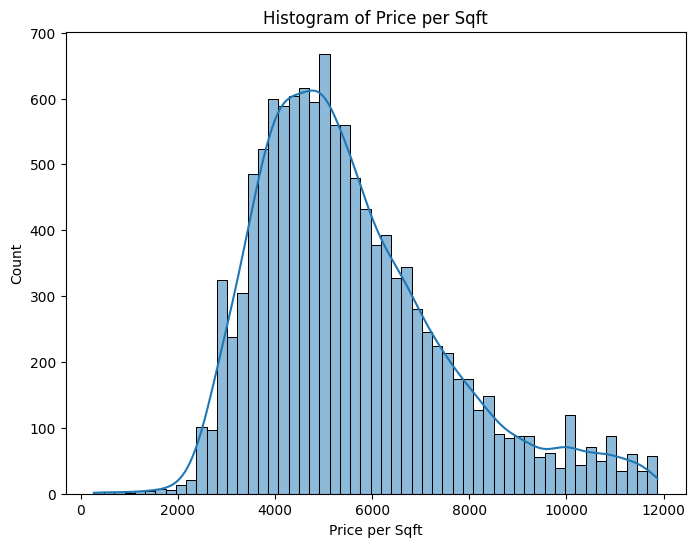

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(outliers['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()


# BOX PLOT

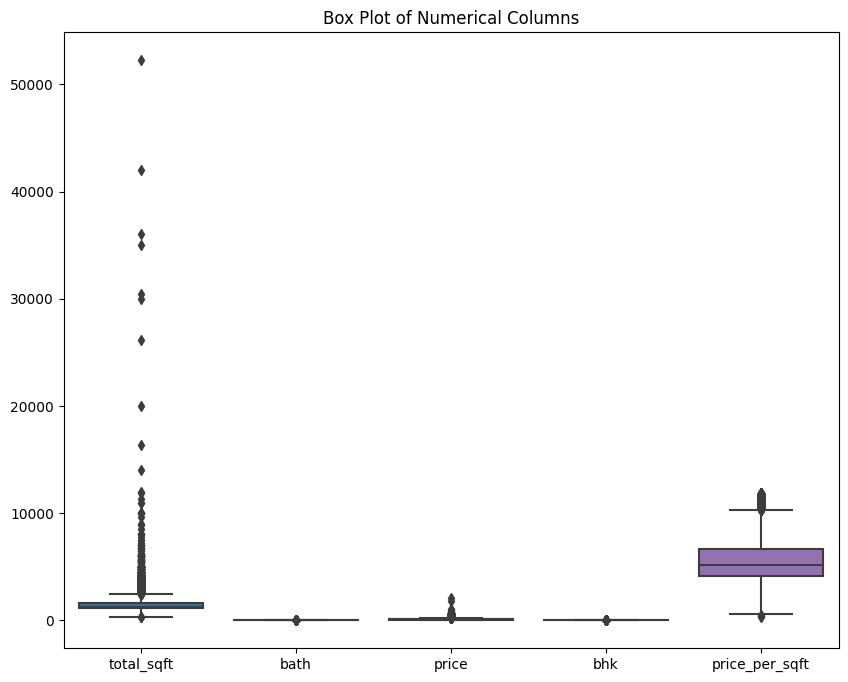

In [40]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=outliers)
plt.title('Box Plot of Numerical Columns')
plt.show()


# CORELATION HEAT MAP

In [44]:
numerical_columns = outliers.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()


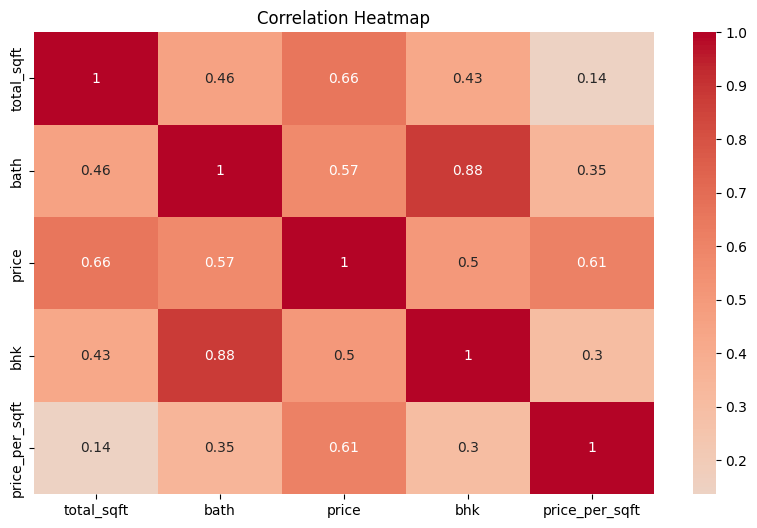

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# SCATTER PLOT

<Figure size 1000x800 with 0 Axes>

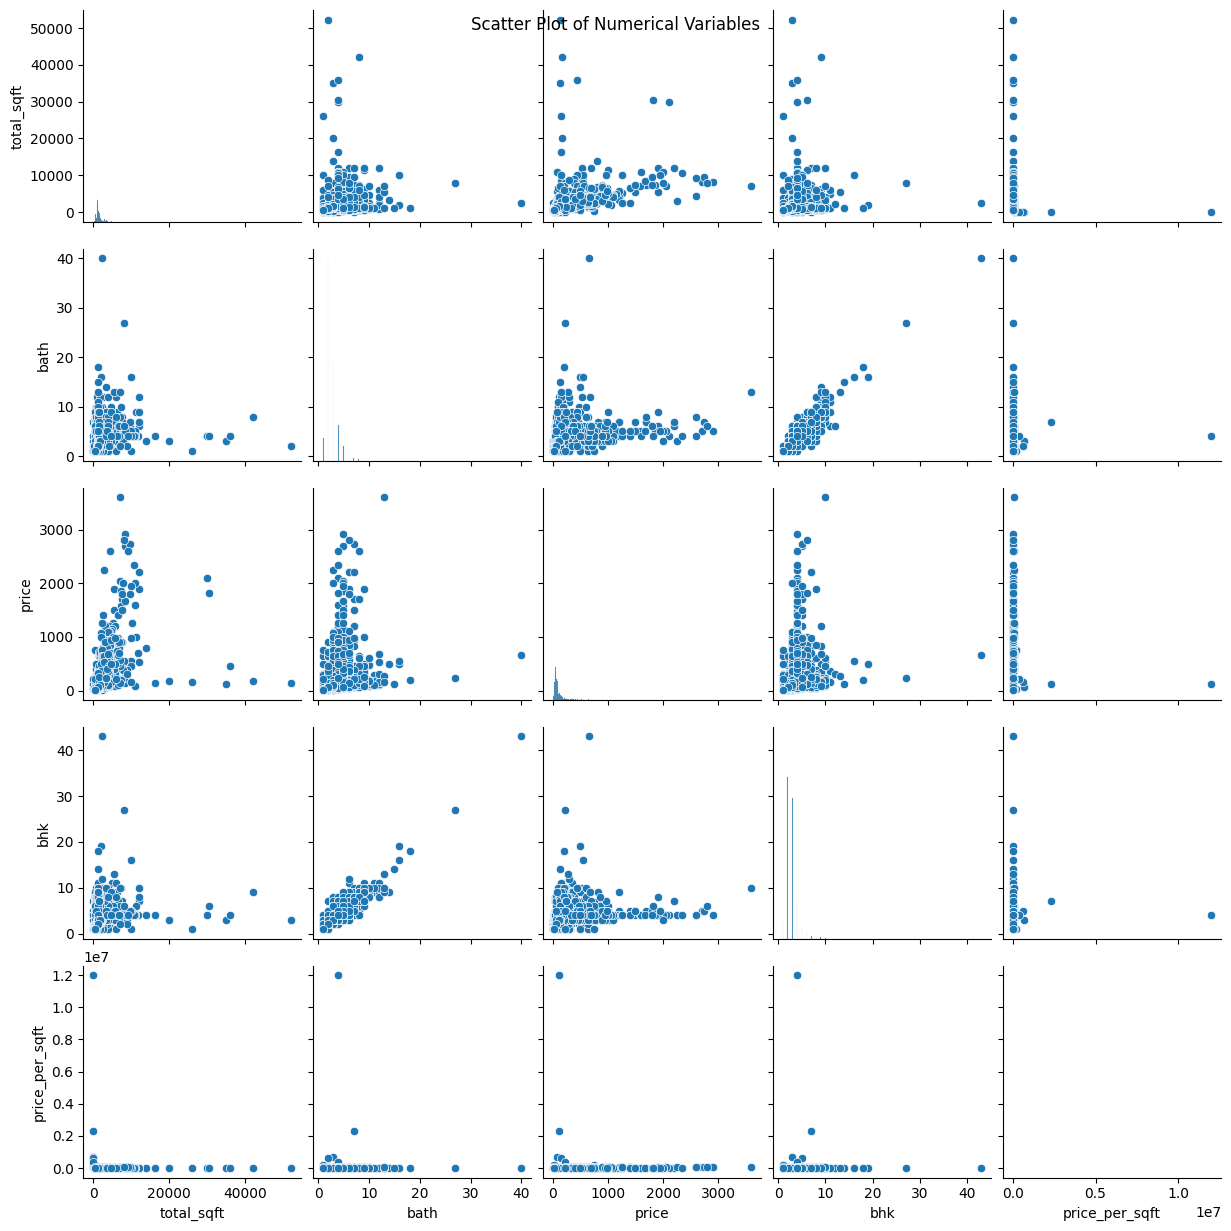

In [14]:
plt.figure(figsize=(10, 8))
numericalcolumns = ['total_sqft','bath','price','bhk','price_per_sqft']
sns.pairplot(data[numericalcolumns])
plt.suptitle('Scatter Plot of Numerical Variables')
plt.show()

# 5. Z SCORE

In [16]:
mean = data['price_per_sqft'].mean()
mean


7920.336742424242

In [17]:
std = data['price_per_sqft'].std()
std

106727.16032810867

In [ ]:
Z=(x-µ)/σ

In [19]:
z = (data['price_per_sqft']-mean)/std
print('Zscore is',z)

Zscore is 0       -0.039553
1       -0.030970
2       -0.033875
3       -0.015697
4       -0.034390
           ...   
13195   -0.011537
13196    0.029896
13197   -0.024945
13198    0.023299
13199   -0.045259
Name: price_per_sqft, Length: 13200, dtype: float64


In [20]:
data['Zscore']= z
data.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.043788
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,-0.004248
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,0.096139
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.028974
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274,0.265665
